<a href="https://colab.research.google.com/github/Mark-DelGrande/Wells-Fargo-Campus-Analytics-Challenge/blob/main/WellsFargoCampusAnalyticsChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import date
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data from Excel Files

In [2]:
train_df = pd.read_excel("./trainset.xlsx")

In [3]:
train_df['FRAUD_NONFRAUD'].value_counts()/ len(train_df['FRAUD_NONFRAUD']) * 100.00

Non-Fraud    70.257143
Fraud        29.742857
Name: FRAUD_NONFRAUD, dtype: float64

In [4]:
test_df = pd.read_excel("./testset_for_participants.xlsx")

In [5]:
train_df.columns

Index(['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT',
       'WF_dvc_age', 'PWD_UPDT_TS', 'CARR_NAME', 'RGN_NAME', 'STATE_PRVNC_TXT',
       'ALERT_TRGR_CD', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD',
       'AUTHC_SCNDRY_STAT_TXT', 'CUST_ZIP', 'CUST_STATE', 'PH_NUM_UPDT_TS',
       'CUST_SINCE_DT', 'TRAN_TS', 'TRAN_DT', 'ACTN_CD', 'ACTN_INTNL_TXT',
       'TRAN_TYPE_CD', 'ACTVY_DT', 'FRAUD_NONFRAUD'],
      dtype='object')

# Feature Engineering 

First thoughts for possiblely valuable features -

Does STATE_PRVNC_TXT == CUST_STATE	

Days since phone number updated

% Account Transaction is for 

Transcation Area Percentage Fraud:

Is the customer Older and make them more suspetabel to scams?

Device age comapred to account age

In [6]:
train_df = train_df.replace({"FRAUD_NONFRAUD": {"Non-Fraud": 0, "Fraud":1}}).copy()
test_df = test_df.replace({"FRAUD_NONFRAUD": {"Non-Fraud": 0, "Fraud":1}}).copy()

In [7]:
train_df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,NaN,UN_PWD,ALLOW,89002,NV,2/24/2021 15:55:10,1993-01-06,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,0
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,NaN,FACE_ID,ALLOW,94541,CA,NaN,1971-01-07,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,0
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,DESKTOP,UN_PWD,ALLOW,21811,MD,5/5/2019 1:8:39,1994-02-01,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,1
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,89822,NV,2/16/2019 6:45:37,2001-11-01,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,0
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,MOBILE,UN_PWD,CHALLENGE_SUCCESS,84108,UT,5/8/2020 10:27:6,1987-02-07,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,142,NaN,cellco partnership dba verizon wireless,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,92503,CA,7/15/2017 6:58:59,2001-06-05,3/12/2021 12:11:59,3/12/2021,SCHPMT,P2P_COMMIT,P2P,3/12/2021,0
13996,114.38,0.00,44,10,272,11/2/2017 4:28:20,t-mobile usa inc.,southwest,california,MOBL,MOBILE,FACE_ID,ALLOW,80478,CO,NaN,2010-06-03,6/11/2021 9:28:20,6/11/2021,SCHPMT,P2P_COMMIT,P2P,6/11/2021,0
13997,493.00,2848.63,54,3,517,6/3/2021 19:31:15,att services inc,southwest,california,MOBL,DESKTOP,UN_PWD,ALLOW,33579,FL,5/25/2021 8:50:5,1984-10-27,5/16/2021 12:31:15,5/16/2021,SCHPMT,P2P_COMMIT,P2P,5/16/2021,1
13998,491.64,3163.25,21,3,0,3/2/2020 11:34:54,NaN,NaN,NaN,ONLN,DESKTOP,UN_PWD,ALLOW,91702,CA,NaN,2021-03-01,5/11/2021 12:34:54,5/11/2021,SCHPMT,P2P_COMMIT,P2P,5/11/2021,1


###Is In-State Transaction

In [8]:
us_state_to_abbrev = {
    "alabama": "AL",
    "alaska": "AK",
    "arizona": "AZ",
    "arkansas": "AR",
    "california": "CA",
    "colorado": "CO",
    "connecticut": "CT",
    "delaware": "DE",
    "florida": "FL",
    "georgia": "GA",
    "hawaii": "HI",
    "idaho": "ID",
    "illinois": "IL",
    "indiana": "IN",
    "iowa": "IA",
    "kansas": "KS",
    "kentucky": "KY",
    "louisiana": "LA",
    "maine": "ME",
    "maryland": "MD",
    "massachusetts": "MA",
    "michigan": "MI",
    "minnesota": "MN",
    "mississippi": "MS",
    "missouri": "MO",
    "montana": "MT",
    "nebraska": "NE",
    "nevada": "NV",
    "new Hampshire": "NH",
    "new Jersey": "NJ",
    "new Mexico": "NM",
    "new York": "NY",
    "north Carolina": "NC",
    "north Dakota": "ND",
    "ohio": "OH",
    "oklahoma": "OK",
    "oregon": "OR",
    "pennsylvania": "PA",
    "rhode Island": "RI",
    "south Carolina": "SC",
    "south Dakota": "SD",
    "tennessee": "TN",
    "texas": "TX",
    "utah": "UT",
    "vermont": "VT",
    "virginia": "VA",
    "washington": "WA",
    "west Virginia": "WV",
    "wisconsin": "WI",
    "wyoming": "WY",
}

# Refrence: https://gist.github.com/rogerallen/1583593

In [9]:
train_df = train_df.replace({"STATE_PRVNC_TXT": us_state_to_abbrev}).copy()
test_df = test_df.replace({"STATE_PRVNC_TXT": us_state_to_abbrev}).copy()

In [10]:
train_df["STATE_PRVNC_TXT"].unique()

array(['NV', 'CA', 'UT', 'TX', nan, 'AZ', 'WI', 'MN', 'phnum penh', 'AL',
       'FL', 'NE', 'none', 'south dakota', 'punjab', 'north carolina',
       'new york', 'MI', 'CO', 'MA', 'antioquia', 'WA', 'AR',
       'new jersey', 'KY', 'ostergotlands lan', 'TN',
       'district of columbia', 'GA', 'MD', 'OR', 'WY', 'OK', 'IL',
       'north dakota', 'IN', 'PA', 'distrito nacional',
       'distrito capital', 'IA', 'zuerich', 'hamerkaz', 'sonora',
       'madrid', 'new mexico', 'new south wales', 'unknown',
       'loire-atlantique', 'carabobo', 'MT', 'ID', 'hong kong', 'OH',
       'south carolina', 'MO', 'colima', 'baja california',
       'noord-brabant', 'nairobi area', 'baden-wuerttemberg', 'VA', 'AK',
       'HI', 'KS', 'greater accra', 'kingston', 'CT', 'LA', 'bolivar',
       'lagos', 'gujarat', 'zulia', 'morelos', 'jalisco', 'san salvador',
       'west bengal', 'guerrero', 'distrito federal', 'MS',
       "saint george's", 'hampshire', 'paris', 'mazowieckie',
       'region met

In [11]:
#define conditions
conditions = [train_df['STATE_PRVNC_TXT'] == train_df['CUST_STATE'], 
              train_df['STATE_PRVNC_TXT'] != train_df['CUST_STATE']]
conditionsTest = [test_df['STATE_PRVNC_TXT'] == test_df['CUST_STATE'], 
              test_df['STATE_PRVNC_TXT'] != test_df['CUST_STATE']]
#define choices
choices = [0, 1]

#create new column in DataFrame that displays results of comparisons
train_df["In_State_Transcation"] = np.select(conditions, choices, default=0)
test_df["In_State_Transcation"] = np.select(conditionsTest, choices, default=0)

#view the DataFrame
train_df[["In_State_Transcation","STATE_PRVNC_TXT", "CUST_STATE"]]

,In_State_Transcation,STATE_PRVNC_TXT,CUST_STATE
0,0,NV,NV
1,0,CA,CA
2,1,UT,MD
3,1,CA,NV
4,1,TX,UT
...,...,...,...
13995,0,CA,CA
13996,1,CA,CO
13997,1,CA,FL
13998,1,NaN,CA


In [12]:
train_df[["In_State_Transcation","FRAUD_NONFRAUD"]]

,In_State_Transcation,FRAUD_NONFRAUD
0,0,0
1,0,0
2,1,1
3,1,0
4,1,1
...,...,...
13995,0,0
13996,1,0
13997,1,1
13998,1,1


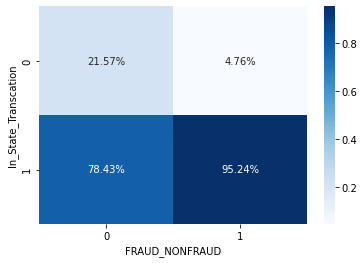

In [13]:
cf_matrix = pd.crosstab(train_df['In_State_Transcation'], train_df['FRAUD_NONFRAUD'], rownames=['In_State_Transcation'], colnames=['FRAUD_NONFRAUD'])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

We can see from above that the large majority of fraudulent transactions happen out side of the customers state

### Days Between Transaction and Last Account Update


In [14]:
train_df.head(2)

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,In_State_Transcation
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,NV,MOBL,NaN,UN_PWD,ALLOW,89002,NV,2/24/2021 15:55:10,1993-01-06,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,0,0
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,CA,MOBL,NaN,FACE_ID,ALLOW,94541,CA,NaN,1971-01-07,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,0,0


In [15]:
train_df['PH_NUM_UPDT_TS']= pd.to_datetime(train_df['PH_NUM_UPDT_TS'],errors='coerce')
train_df['PWD_UPDT_TS']= pd.to_datetime(train_df['PWD_UPDT_TS'],errors='coerce')
train_df['TRAN_TS']= pd.to_datetime(train_df['TRAN_TS'],errors='coerce')

test_df['PH_NUM_UPDT_TS']= pd.to_datetime(test_df['PH_NUM_UPDT_TS'],errors='coerce')
test_df['PWD_UPDT_TS']= pd.to_datetime(test_df['PWD_UPDT_TS'],errors='coerce')
test_df['TRAN_TS']= pd.to_datetime(test_df['TRAN_TS'],errors='coerce')

In [16]:
train_df['DAYS_SINCE_PWD_UPDT'] = (train_df['TRAN_TS'] - train_df['PWD_UPDT_TS']).dt.days
train_df['DAYS_SINCE_PH_NUM_UPDT'] = (train_df['TRAN_TS'] - train_df['PH_NUM_UPDT_TS']).dt.days

test_df['DAYS_SINCE_PWD_UPDT'] = (test_df['TRAN_TS'] - test_df['PWD_UPDT_TS']).dt.days
test_df['DAYS_SINCE_PH_NUM_UPDT'] = (test_df['TRAN_TS'] - test_df['PH_NUM_UPDT_TS']).dt.days

In [17]:
train_df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,In_State_Transcation,DAYS_SINCE_PWD_UPDT,DAYS_SINCE_PH_NUM_UPDT
0,5.38,23619.91,47,4,2777,2018-01-16 11:03:58,cox communications inc.,southwest,NV,MOBL,NaN,UN_PWD,ALLOW,89002,NV,2021-02-24 15:55:10,1993-01-06,2021-05-03 18:03:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,0,0,1203.0,68.0
1,65.19,0.00,45,5,2721,NaT,charter communications,southwest,CA,MOBL,NaN,FACE_ID,ALLOW,94541,CA,NaT,1971-01-07,2021-01-13 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,0,0,NaN,NaN
2,54.84,34570.63,36,8,1531,2021-12-22 10:42:51,utah broadband llc,mountain,UT,ONLN,DESKTOP,UN_PWD,ALLOW,21811,MD,2019-05-05 01:08:39,1994-02-01,2021-04-08 09:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,1,1,-259.0,704.0
3,0.01,0.00,62,3,835,2020-02-08 07:28:31,t-mobile usa inc.,southwest,CA,MOBL,MOBILE,UN_PWD,ALLOW,89822,NV,2019-02-16 06:45:37,2001-11-01,2021-08-10 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,0,1,549.0,906.0
4,497.08,12725.18,81,2,1095,2020-12-28 12:12:44,cogent communications,south central,TX,MOBL,MOBILE,UN_PWD,CHALLENGE_SUCCESS,84108,UT,2020-05-08 10:27:06,1987-02-07,2021-06-27 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,1,1,180.0,415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,142,NaT,cellco partnership dba verizon wireless,southwest,CA,MOBL,MOBILE,UN_PWD,ALLOW,92503,CA,2017-07-15 06:58:59,2001-06-05,2021-03-12 12:11:59,3/12/2021,SCHPMT,P2P_COMMIT,P2P,3/12/2021,0,0,NaN,1336.0
13996,114.38,0.00,44,10,272,2017-11-02 04:28:20,t-mobile usa inc.,southwest,CA,MOBL,MOBILE,FACE_ID,ALLOW,80478,CO,NaT,2010-06-03,2021-06-11 09:28:20,6/11/2021,SCHPMT,P2P_COMMIT,P2P,6/11/2021,0,1,1317.0,NaN
13997,493.00,2848.63,54,3,517,2021-06-03 19:31:15,att services inc,southwest,CA,MOBL,DESKTOP,UN_PWD,ALLOW,33579,FL,2021-05-25 08:50:05,1984-10-27,2021-05-16 12:31:15,5/16/2021,SCHPMT,P2P_COMMIT,P2P,5/16/2021,1,1,-19.0,-9.0
13998,491.64,3163.25,21,3,0,2020-03-02 11:34:54,NaN,NaN,NaN,ONLN,DESKTOP,UN_PWD,ALLOW,91702,CA,NaT,2021-03-01,2021-05-11 12:34:54,5/11/2021,SCHPMT,P2P_COMMIT,P2P,5/11/2021,1,1,435.0,NaN


### Percentage of Account the Transaction is for


In [18]:
train_df['TRAN_ACCT_PERCENT'] =  train_df['TRAN_AMT']/train_df["ACCT_PRE_TRAN_AVAIL_BAL"]
test_df['TRAN_ACCT_PERCENT'] =  test_df['TRAN_AMT']/train_df["ACCT_PRE_TRAN_AVAIL_BAL"]

In [19]:
train_df = train_df.replace({"TRAN_ACCT_PERCENT": {np.inf: -1}}).copy()
test_df = test_df.replace({"TRAN_ACCT_PERCENT": {np.inf: -1}}).copy()

### Device Age Compared to Account Age

In [20]:
train_df['CUST_SINCE_DT']= pd.to_datetime(train_df['CUST_SINCE_DT'],errors='coerce')
train_df['DAYS_SINCE_BEING_CUST'] = (train_df['TRAN_TS'] - train_df['CUST_SINCE_DT']).dt.days

test_df['CUST_SINCE_DT']= pd.to_datetime(test_df['CUST_SINCE_DT'],errors='coerce')
test_df['DAYS_SINCE_BEING_CUST'] = (test_df['TRAN_TS'] - test_df['CUST_SINCE_DT']).dt.days

In [21]:
train_df['PERCENT_WF_DVC_AGE'] = train_df['WF_dvc_age']/train_df['DAYS_SINCE_BEING_CUST']

test_df['PERCENT_WF_DVC_AGE'] = test_df['WF_dvc_age']/test_df['DAYS_SINCE_BEING_CUST']

In [22]:
train_df = train_df.replace({"PERCENT_WF_DVC_AGE": {np.inf: -1}}).copy()

test_df = test_df.replace({"PERCENT_WF_DVC_AGE": {np.inf: -1}}).copy()

In [23]:
train_df.loc[train_df['PERCENT_WF_DVC_AGE'] == np.inf]

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,In_State_Transcation,DAYS_SINCE_PWD_UPDT,DAYS_SINCE_PH_NUM_UPDT,TRAN_ACCT_PERCENT,DAYS_SINCE_BEING_CUST,PERCENT_WF_DVC_AGE


### DVC_TYPE_TXT comapred to ALERT_TRGR_CD

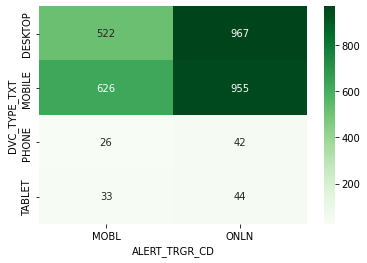

In [24]:
cf_matrix = pd.crosstab(train_df['DVC_TYPE_TXT'], columns=[train_df['ALERT_TRGR_CD']], values=train_df['FRAUD_NONFRAUD'], aggfunc='sum').fillna(0)

sns.heatmap(cf_matrix, annot=True, fmt='',cmap='Greens')
plt.show()

Best to one hot encode this since there oes not seem to be any notable relation ship bwtween the two variables rather then make a feature

### Transaction type

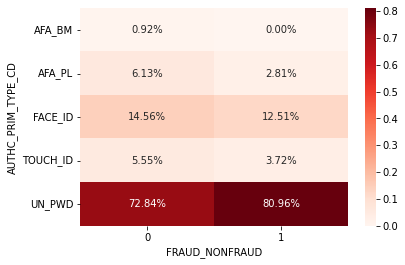

In [25]:
cf_matrix = pd.crosstab(train_df['AUTHC_PRIM_TYPE_CD'], train_df['FRAUD_NONFRAUD'], rownames=['AUTHC_PRIM_TYPE_CD'], colnames=['FRAUD_NONFRAUD'])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')
plt.show()

### One hot encodings

In [26]:
train_df.head(2)

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,In_State_Transcation,DAYS_SINCE_PWD_UPDT,DAYS_SINCE_PH_NUM_UPDT,TRAN_ACCT_PERCENT,DAYS_SINCE_BEING_CUST,PERCENT_WF_DVC_AGE
0,5.38,23619.91,47,4,2777,2018-01-16 11:03:58,cox communications inc.,southwest,NV,MOBL,NaN,UN_PWD,ALLOW,89002,NV,2021-02-24 15:55:10,1993-01-06,2021-05-03 18:03:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,0,0,1203.0,68.0,0.000228,10344,0.268465
1,65.19,0.00,45,5,2721,NaT,charter communications,southwest,CA,MOBL,NaN,FACE_ID,ALLOW,94541,CA,NaT,1971-01-07,2021-01-13 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,0,0,NaN,NaN,-1.000000,18269,0.148941


In [27]:
df_AUTHC_PRIM_TYPE_CD = pd.get_dummies(train_df.AUTHC_PRIM_TYPE_CD, prefix='AUTHC_PRIM_TYPE_CD')
df_ALERT_TRGR_CD = pd.get_dummies(train_df.ALERT_TRGR_CD, prefix='ALERT_TRGR_CD')
df_DVC_TYPE_TXT = pd.get_dummies(train_df.DVC_TYPE_TXT, prefix='DVC_TYPE_TXT')
df_AUTHC_SCNDRY_STAT_TXT = pd.get_dummies(train_df.AUTHC_SCNDRY_STAT_TXT, prefix='AUTHC_SCNDRY_STAT_TXT')

df_AUTHC_PRIM_TYPE_CD_TEST = pd.get_dummies(test_df.AUTHC_PRIM_TYPE_CD, prefix='AUTHC_PRIM_TYPE_CD')
df_ALERT_TRGR_CD_TEST = pd.get_dummies(test_df.ALERT_TRGR_CD, prefix='ALERT_TRGR_CD')
df_DVC_TYPE_TXT_TEST = pd.get_dummies(test_df.DVC_TYPE_TXT, prefix='DVC_TYPE_TXT')
df_AUTHC_SCNDRY_STAT_TXT_TEST = pd.get_dummies(test_df.AUTHC_SCNDRY_STAT_TXT, prefix='AUTHC_SCNDRY_STAT_TXT')

In [28]:
train_df = pd.concat([train_df, df_ALERT_TRGR_CD], axis=1).copy()
test_df = pd.concat([test_df, df_ALERT_TRGR_CD_TEST], axis=1).copy()

In [29]:
final_Train_df = train_df[["TRAN_AMT", "ACCT_PRE_TRAN_AVAIL_BAL", "CUST_AGE", "OPEN_ACCT_CT", "WF_dvc_age","In_State_Transcation","DAYS_SINCE_PWD_UPDT", "DAYS_SINCE_PH_NUM_UPDT",
                          "TRAN_ACCT_PERCENT", "DAYS_SINCE_BEING_CUST", "PERCENT_WF_DVC_AGE","ALERT_TRGR_CD_MOBL", "ALERT_TRGR_CD_ONLN", "FRAUD_NONFRAUD"]]

final_Test_df = test_df[["TRAN_AMT", "ACCT_PRE_TRAN_AVAIL_BAL", "CUST_AGE", "OPEN_ACCT_CT", "WF_dvc_age","In_State_Transcation","DAYS_SINCE_PWD_UPDT", "DAYS_SINCE_PH_NUM_UPDT",
                          "TRAN_ACCT_PERCENT", "DAYS_SINCE_BEING_CUST", "PERCENT_WF_DVC_AGE", "ALERT_TRGR_CD_MOBL", "ALERT_TRGR_CD_ONLN"]]

In [30]:
final_Train_df = final_Train_df.drop(columns='ALERT_TRGR_CD_ONLN')
final_Test_df = final_Test_df.drop(columns='ALERT_TRGR_CD_ONLN')

# XG Boost Classification Model

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

!pip install eli5

from eli5 import show_weights
from eli5 import explain_prediction

In [32]:
X = final_Train_df.drop("FRAUD_NONFRAUD", axis =1)
Y = final_Train_df.FRAUD_NONFRAUD

In [55]:
seed = 15
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.09%


In [68]:
y_true = y_test
y_pred = model.predict(X_test)
print(f1_score(y_true, y_pred))

0.9152035861038477


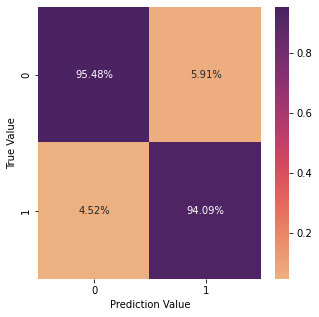

In [67]:
pred_cf_matrix = pd.crosstab(y_true, y_pred, rownames=['True Value'], colnames=['Prediction Value'])

sns.heatmap(pred_cf_matrix/np.sum(pred_cf_matrix), annot=True, 
            fmt='.2%', cmap='flare')
plt.show()

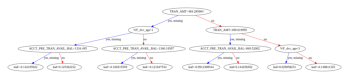

In [34]:
xgb.plot_tree(model,num_trees=2)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

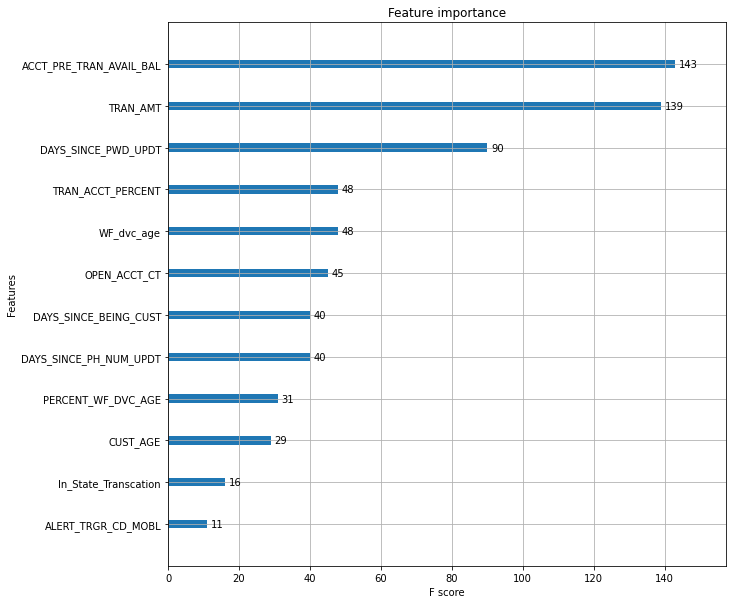

In [35]:
xgb.plot_importance(model, max_num_features=25)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [36]:
show_weights(model)

Weight,Feature
0.4662,TRAN_AMT
0.0977,TRAN_ACCT_PERCENT
0.0799,ACCT_PRE_TRAN_AVAIL_BAL
0.0783,WF_dvc_age
0.0581,PERCENT_WF_DVC_AGE
0.0549,In_State_Transcation
0.0483,DAYS_SINCE_PH_NUM_UPDT
0.0463,DAYS_SINCE_PWD_UPDT
0.0297,ALERT_TRGR_CD_MOBL
0.0187,OPEN_ACCT_CT


In [37]:
final_Test_df.iloc[0]

TRAN_AMT                     54.250000
ACCT_PRE_TRAN_AVAIL_BAL       0.000000
CUST_AGE                     23.000000
OPEN_ACCT_CT                  4.000000
WF_dvc_age                  634.000000
In_State_Transcation          1.000000
DAYS_SINCE_PWD_UPDT         112.000000
DAYS_SINCE_PH_NUM_UPDT      915.000000
TRAN_ACCT_PERCENT             0.002297
DAYS_SINCE_BEING_CUST      3611.000000
PERCENT_WF_DVC_AGE            0.175575
ALERT_TRGR_CD_MOBL            1.000000
Name: 0, dtype: float64

In [38]:
explain_prediction(model, final_Test_df.iloc[0])

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0,\n              learning_rate=0.1, max_delta_step=0, max_depth=3,\n              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,\n              nthread=None, objective='binary:logistic', random_state=0,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n              silent=None, subsample=1, verbosity=1)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='ACCT_PRE_TRAN_AVAIL_BAL', weight=2.9241796795142516, std=None, value=0.0), FeatureWeight(feature='TRAN_AMT', weight=1.254582765412029, std=None, value=54.25), FeatureWeight(feature='<BIAS>', weight=1.246939724253893, std=None, value=1.0), FeatureWeight(feature='TRAN_ACCT_PERCENT', weight=0.7423904488502657, std=None, value=0.0022967911393396503), FeatureWeight(feature='DAYS_SINCE_PH_NUM_UPDT', weight=0.1867038599338162, std=None, value=915.0), FeatureWeight(feature='ALERT_TRGR_CD_MOBL', weight=0.16896437387225563, std=None, value=1.0), FeatureWeight(feature='OPEN_ACCT_CT', weight=0.06817165402711593, std=None, value=4.0), FeatureWeight(feature='PERCENT_WF_DVC_AGE', weight=0.06015788696039132, std=None, value=0.17557463306563278), FeatureWeight(feature='DAYS_SINCE_PWD_UPDT', weight=0.053379474036603314, std=None, value=112.0), FeatureWeight(feature='WF_dvc_age', weight=0.04454133375822114, std=None, value=634.0), FeatureWeight(feature='DAYS_SINCE_BEING_CUST', weight=0.02624888569911818, std=None, value=3611.0)], neg=[FeatureWeight(feature='In_State_Transcation', weight=-0.05747219244752518, std=None, value=1.0), FeatureWeight(feature='CUST_AGE', weight=-0.05046574568043554, std=None, value=23.0)], pos_remaining=0, neg_remaining=0), proba=0.9987311, score=-6.668322148189999, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [39]:
Predictions = model.predict(final_Test_df)
Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
TestingResults = pd.DataFrame({'dataset_id':test_df['dataset_id'], "FRAUD_NONFRAUD": Predictions})

In [41]:
TestingResults['FRAUD_NONFRAUD'].value_counts()/ len(TestingResults['FRAUD_NONFRAUD']) * 100.00

0    71.6
1    28.4
Name: FRAUD_NONFRAUD, dtype: float64

In [42]:
TestingResults.to_csv('./testset_for_participants_Results.csv', index=False)